In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats.mstats import winsorize
from scipy.stats import skew, kurtosis

In [3]:
path = "/content/drive/My Drive/GenAI-ML-BootCamp-PSTB/Week3/AAPL, 1D 01012007-12072023/AAPL, 1D 01012007-12072023.csv"
data = pd.read_csv(path)
data.shape


(4159, 8)

In [4]:
data.head()

,volume,vwap,open,close,high,low,time,transactions
0,1.245445e+09,3.0302,3.0821,2.9929,3.0921,2.9250,1167800400,189737
1,8.554834e+08,3.0403,3.0018,3.0593,3.0696,2.9936,1167886800,136333
2,8.352580e+08,3.0426,3.0632,3.0375,3.0786,3.0143,1167973200,141050
3,7.974138e+08,3.0683,3.0700,3.0525,3.0904,3.0457,1168232400,130547
4,3.352007e+09,3.1946,3.0875,3.3061,3.3207,3.0411,1168318800,569578


Expliquer les colonnes:
*
*
*
*
*
*


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4159 entries, 0 to 4158
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   volume        4159 non-null   float64
 1   vwap          4159 non-null   float64
 2   open          4159 non-null   float64
 3   close         4159 non-null   float64
 4   high          4159 non-null   float64
 5   low           4159 non-null   float64
 6   time          4159 non-null   int64  
 7   transactions  4159 non-null   int64  
dtypes: float64(6), int64(2)
memory usage: 260.1 KB


The volume-weighted average price (VWAP) is a technical analysis indicator used on intraday charts that resets at the start of every new trading session. It's the average price a security has traded at throughout the day, based on both volume and price.

VWAP is important because it provides traders with insight into both the price trend and value of a security.

In [6]:
data.isnull().sum()

,0
volume,0
vwap,0
open,0
close,0
high,0
low,0
time,0
transactions,0


In [7]:
data.duplicated().sum()

0

In [8]:
#df[["volume", "vwap", "open", "close", "high", "low", "transactions"]].describe()
data.describe()

,volume,vwap,open,close,high,low,time,transactions
count,4.159000e+03,4159.000000,4159.000000,4159.000000,4159.000000,4159.000000,4.159000e+03,4.159000e+03
mean,3.662925e+08,46.391382,46.362788,46.396058,46.881127,45.865790,1.428315e+09,2.709318e+05
std,3.724793e+08,50.277557,50.235593,50.293482,50.843874,49.680104,1.505279e+08,2.510859e+05
min,2.422234e+07,2.841000,2.835400,2.792900,2.928600,2.792900,1.167800e+09,3.048700e+04
25%,1.067497e+08,11.936200,11.955700,11.947150,12.028400,11.853600,1.297876e+09,1.128150e+05
50%,2.136463e+08,25.885200,25.775000,25.825000,26.262800,25.680000,1.428466e+09,1.782460e+05
75%,4.965321e+08,52.154150,52.263750,52.231250,52.626250,51.796250,1.558627e+09,3.259555e+05
max,3.373042e+09,193.102000,193.780000,193.970000,194.480000,191.760000,1.689134e+09,2.966979e+06


La premiere remqurque qui peut attirer notre attention est que les colonnes price ont des parapmètres statistiques très proches. Ils sembles que ces variblae ssoient formtement corrélées.

Paragraphe pour decrire qu'"il auriat des outliers dans la maojorité de nos colonnes. ON va d'abord tracer les vilolin plot , puis les distributions pour savoir le choix de regelr le rpbole des outiliers, puis la heatmaps avant et aprtes log transformation pour etre sur que la transofrmation n'a pas modifé les reltion de correlation .

**Detection des Outliers**

Nous remarquoon la présences des outliers dans toutes les colonnes.
Compte tenu de la présence de série temporelles, nous devons faire tres attention quant au choix de la transofrmaiton de nos colonnes.

Commençons d'abors par regarder lles distributions

Index(['volume', 'vwap', 'open', 'close', 'high', 'low', 'transactions'], dtype='object')


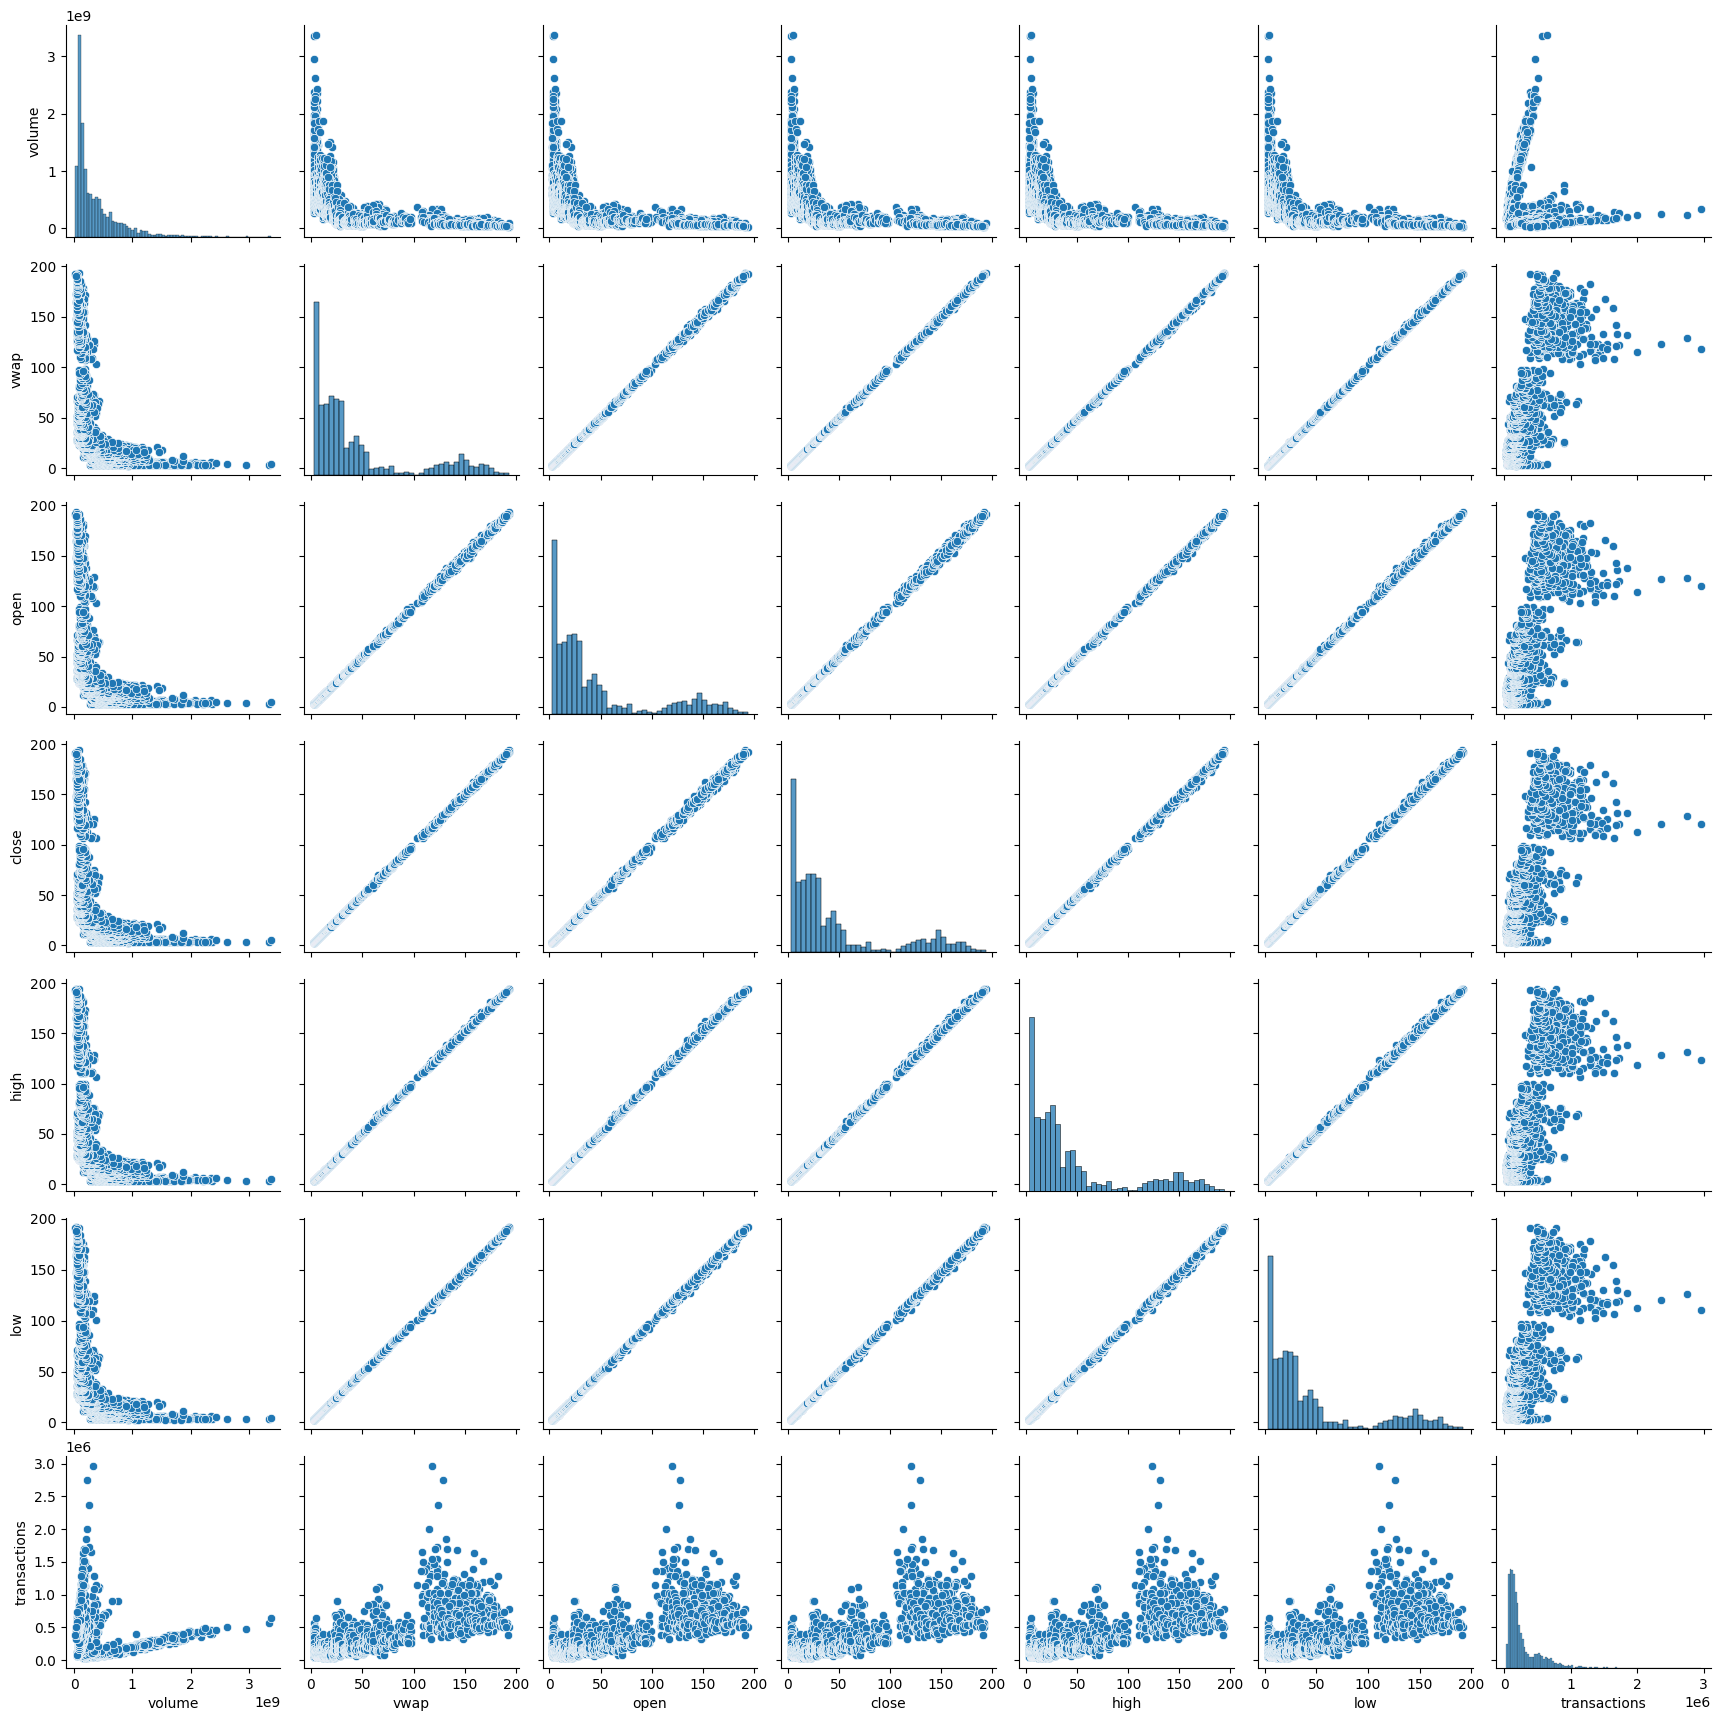

In [9]:
# Selecting numerical columns (excluding 'time') for analysis

num_cols =data.select_dtypes(include=np.number).drop(columns = ["time"]).columns
print(num_cols)

# Pairplot to visualize relationships between numerical variables
sns.pairplot(data[num_cols])
plt.show()

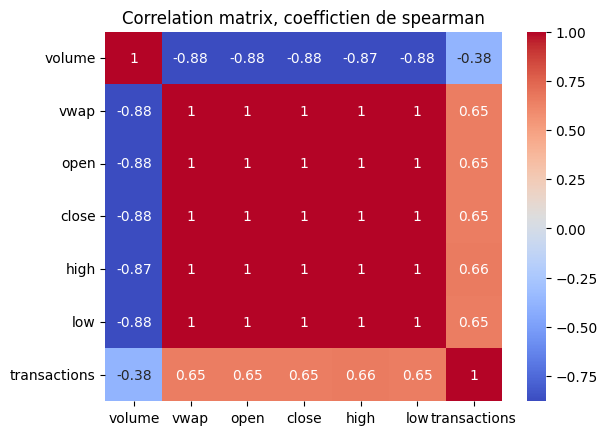

In [10]:
# Spearman correlation heatmap
sns.heatmap(data[num_cols].corr(method="spearman"), annot=True, cmap='coolwarm')
plt.title("Correlation matrix, coeffictien de spearman")
plt.show()

En fin la heatmap confirme un comprotement identiques des varibales price.

Dans un 1er temps, nous garderons la conne vwap et nous reintegrerons les colonnes "open", "close", "high", "low" dans l'étape de l'anlyse.

In [11]:
df = data.drop(columns = ["open", "close", "high", "low"], inplace=False)
df.columns

Index(['volume', 'vwap', 'time', 'transactions'], dtype='object')

**Detection des outliers **

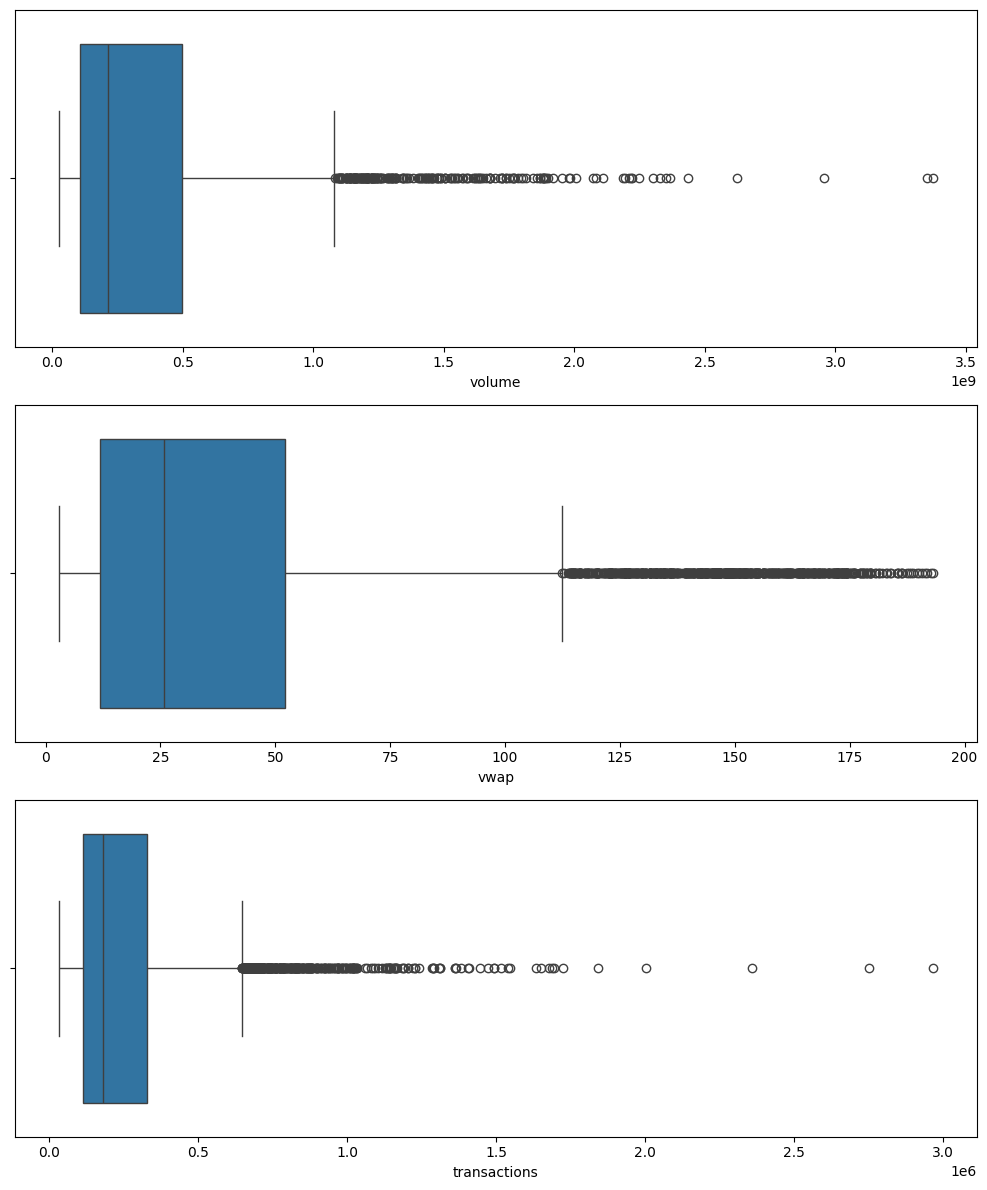

In [12]:
# Boxplots to detect potential outliers
number_of_cols =1
number_of_rows = 3
fig, axes =plt.subplots(nrows=number_of_rows, ncols=number_of_cols, figsize=(10, 4* number_of_rows))

axes = axes.flatten()
num_cols = df.select_dtypes(include=np.number).drop(columns = ["time"]).columns

for i, col in enumerate(num_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    #axes[i].set_title(col)

plt.tight_layout()
plt.show()

Il est clair que des outliers existent dans les trois variable.

Afin de diminuer leur effet pour notre analyse , nous allons devoir effectuer des transofrtions.

Nous nous occupons des colonnes volume et transaction dont les distribution sont clairment skewed. Nous apliquerons une transofrmation log.

In [13]:
df["volume_log"] = np.log(df["volume"])
df["transactions_log"] = np.log(df["transactions"])

verifions l'effet de cette transofmration sur les distributions et les correlations :

<Figure size 800x400 with 0 Axes>

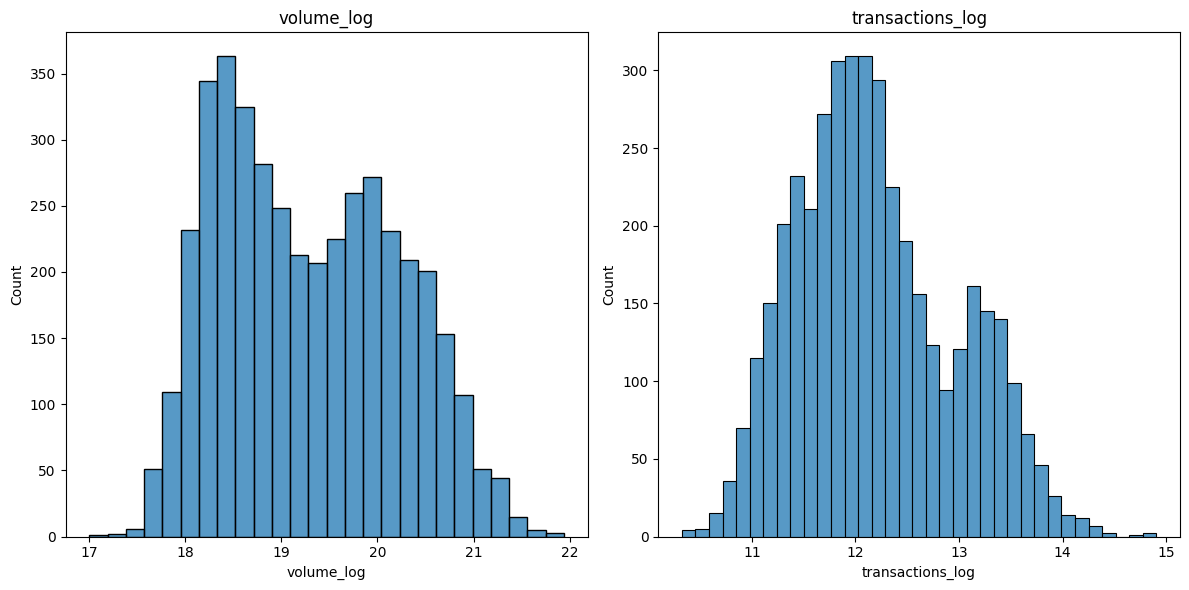

In [14]:
# Histograms to visualize transformed distributions
plt.figure(figsize=(8, 4))
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

for i, col in enumerate(["volume_log", "transactions_log"]):
    sns.histplot(x=df[col], ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

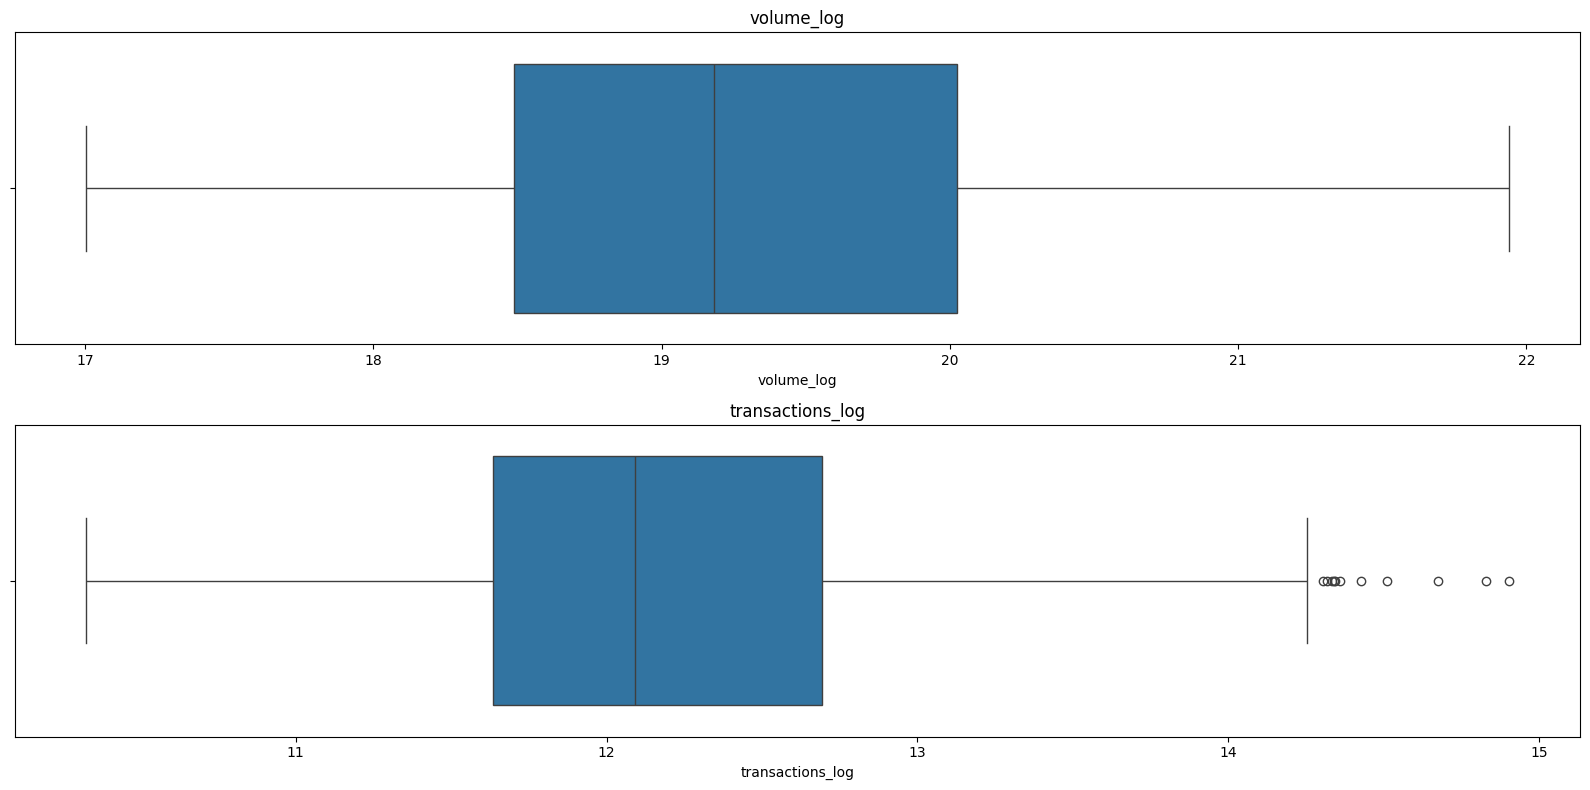

In [15]:
# Boxplots for transformed features to confirm outlier treatment
number_of_cols =1
number_of_rows = 2
fig, axes =plt.subplots(nrows=number_of_rows, ncols=number_of_cols, figsize=(16, 4 * number_of_rows))

#axes = axes.flatten()
#num_cols = df.select_dtypes(include=np.number).drop(columns = ["time"]).columns

for i, col in enumerate(["volume_log", "transactions_log"]):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

Des outliers restent dans la variables transcation. Nous tenter de réduire leur effet avec une winsorization.

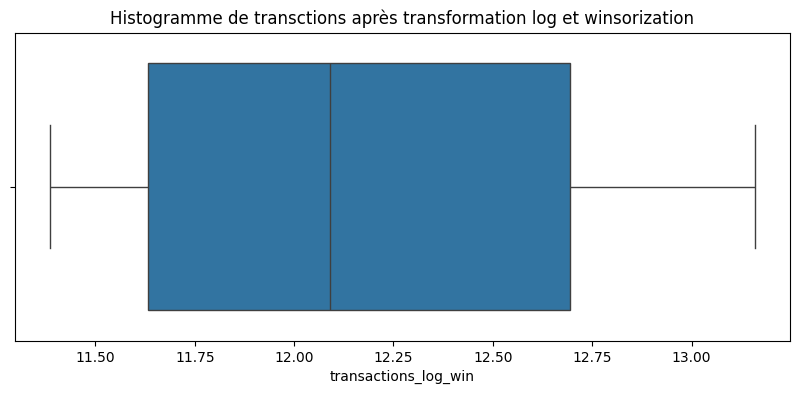

In [16]:
# Winsorization to further reduce the impact of extreme values
df["transactions_log_win"] = stats.mstats.winsorize(df["transactions_log"], limits=[0.15, 0.15])

# Boxplot after winsorization
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['transactions_log_win'])
plt.title("Histogramme de transctions après transformation log et winsorization")
plt.show()

Les outliers semblent avoir disparus. Nou sveirifons maitenat l'effet des transiofrmation sur la correlation entre elles et avec la lcolonne volume.

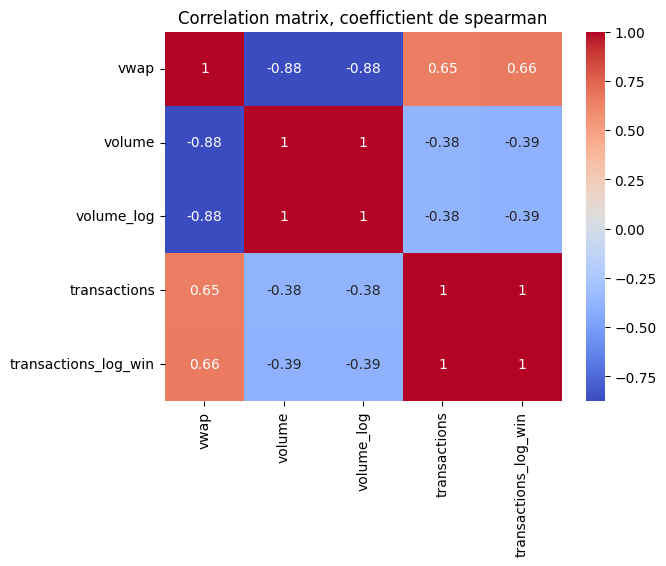

In [17]:
# Spearman correlation heatmap after transformations
sns.heatmap(df[["vwap", "volume", "volume_log", "transactions", "transactions_log_win"]].corr(method="spearman"), annot=True, cmap='coolwarm')
plt.title("Correlation matrix, coeffictient de spearman")
plt.show()

Les coefficients de correlation sont quasiment identiques. Nous allons pour la suite garder uniquement volume_log et transcation_log_win.

In [18]:
df_transformed = df.drop(columns = ["volume", "transactions", "transactions_log"], inplace=False)
df_transformed.columns

Index(['vwap', 'time', 'volume_log', 'transactions_log_win'], dtype='object')

Revenons maitenant à la clonne vwap.

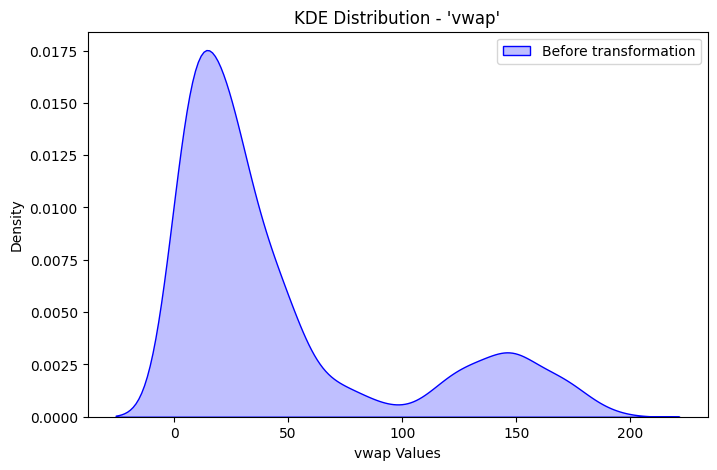

In [19]:
# KDE plot to visualize the effect of transformations on 'vwap'
plt.figure(figsize=(8, 5))
sns.kdeplot(df["vwap"], fill=True, color="blue", label="Before transformation")
plt.title("KDE Distribution - 'vwap'")
plt.xlabel("vwap Values")
plt.ylabel("Density")
plt.legend()
plt.show()


La distribution KDE de la variable vwap semble bimodale avec une légère asymétrie vers la droite pour chaque mode. Il semble également que les deux mode sont proche d'une loi normale. Enfin, le 2nd mode semble être positivment skewed.

Nous allons vérifions toutes ces premières impression sur la colonne vwap.

In [20]:
df_transformed["vwap"].describe()

,vwap
count,4159.000000
mean,46.391382
std,50.277557
min,2.841000
25%,11.936200
50%,25.885200
75%,52.154150
max,193.102000


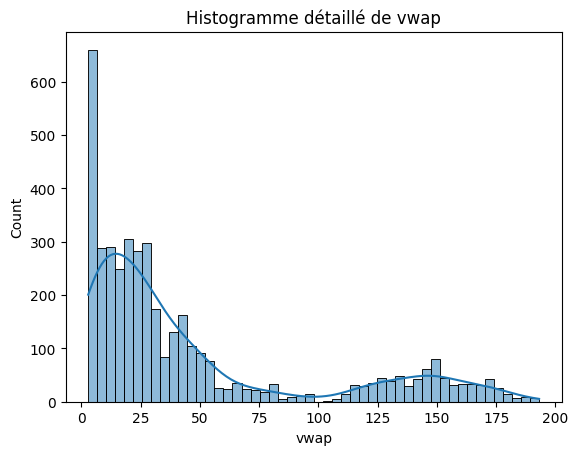

In [21]:
sns.histplot(df_transformed["vwap"], bins=50, kde=True)
plt.title("Histogramme détaillé de vwap")
plt.show()


La bimodalité est confirmée, elle a lieu au niveau de 100 avec modes de comporetements différents. En plus, les deux modes semblent suivre deux lois différentes.

Dans ce qui suit, nous allons d'abord easseyer de comprendre l'origine de bimodalité (si elle est liée à des periodes spécifiques de la journée).

Cela nous confirmera ou pas, la séparation à 100 que nous avons prédite via l ekde et l'histogramme ci-dessus.

Par la suite, nous detemineront la nature de la distribution de chaque mode afin de choisir la transformation adaptée à chacun.

In [22]:
df_transformed["time"].values

array([1167800400, 1167886800, 1167973200, ..., 1688961600, 1689048000,
       1689134400])

In [23]:
print(df_transformed["time"].dtype)

int64


In [24]:
df_transformed["time"].nunique()

4159

In [25]:
# Converting 'time' from seconds to datetime format
df_transformed["time"] = pd.to_datetime(df_transformed["time"], unit ='s')
print(df_transformed["time"])

0      2007-01-03 05:00:00
1      2007-01-04 05:00:00
2      2007-01-05 05:00:00
3      2007-01-08 05:00:00
4      2007-01-09 05:00:00
               ...        
4154   2023-07-06 04:00:00
4155   2023-07-07 04:00:00
4156   2023-07-10 04:00:00
4157   2023-07-11 04:00:00
4158   2023-07-12 04:00:00
Name: time, Length: 4159, dtype: datetime64[ns]


Les dates sont affichées en nano seconde.

Même si les prix en trading ont tendance à fluctuer continuellement, nous allons nous intéresser unqiuement aux changements globaux le long des heures d'une journée.

In [26]:
df_transformed["hour"] = df_transformed["time"].dt.hour
print(df_transformed["hour"])

0       5
1       5
2       5
3       5
4       5
       ..
4154    4
4155    4
4156    4
4157    4
4158    4
Name: hour, Length: 4159, dtype: int32


In [27]:
df_transformed.columns

Index(['vwap', 'time', 'volume_log', 'transactions_log_win', 'hour'], dtype='object')

In [28]:
df_transformed["hour"].unique()

array([5, 4], dtype=int32)

In [29]:
df_transformed["hour"].value_counts()

,count
hour,
4,2737
5,1422


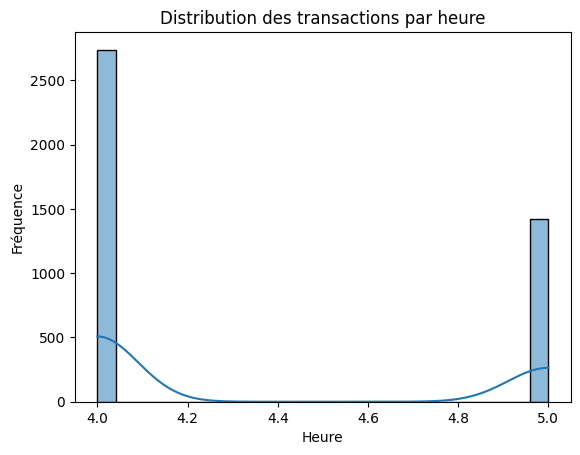

In [30]:
# Histogram of transaction distribution per hour
sns.histplot(df_transformed['hour'], bins=24, kde=True)
plt.title("Distribution des transactions par heure")
plt.xlabel("Heure")
plt.ylabel("Fréquence")
plt.show()

Avant d'explorer plus la colonne vwap, nous devons vérifier l'existence d'outliers (la box plot ne permet pas de les voir contrairement à la KDE qui montre un étirement vers la droite. )

In [31]:
## Checking outlier percentage for selected columns and hours

# Function to calculate the percentage of outliers based on IQR
def calculate_outlier_percentage(df, column, hour):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  outliers = df[(df["hour"] == hour) & ((df[column] < lower_bound) | (df[column] > upper_bound))]
  percentage_outliers = (len(outliers) / len(df[df["hour"] == hour])) * 100
  return percentage_outliers

# Columns to check for outliers
columns_to_check = ["vwap", "volume_log", "transactions_log_win"]

# Hours to check
hours_to_check = [4, 5]

# Calculate and print outlier percentages for each column and hour
for column in columns_to_check:
  for hour in hours_to_check:
    percentage = calculate_outlier_percentage(df_transformed, column, hour)
    print(f"Percentage of {column} outliers at {hour}h: {percentage:.2f}%")

Percentage of vwap outliers at 4h: 16.92%
Percentage of vwap outliers at 5h: 18.21%
Percentage of volume_log outliers at 4h: 0.00%
Percentage of volume_log outliers at 5h: 0.00%
Percentage of transactions_log_win outliers at 4h: 0.00%
Percentage of transactions_log_win outliers at 5h: 0.00%


Les deux modes de la variable vwap présentent des outliers d'un pourcentage relativement élevé par rapport à la taille de notre dataset.

Dans ce qui suit, nous devons determnier la nature des distributions des deux modes afin de choisir la transofrmation la plus adpatée pour chacun.

Commençons d'abord par le test de Shapiro  avec

* H_0 : les deux mode suivent la loi Gaussienne

In [32]:
df_4=df_transformed[df_transformed["hour"]==4]
df_5=df_transformed[df_transformed["hour"]==5]

# Shapiro-Wilk test for normality at 4 and 5 hours
stat, p = stats.shapiro(df_4["vwap"])  # Changed to df_4["vwap"]
print('stat=%.3f, p=%.3f' % (stat, p))

stat, p = stats.shapiro(df_5["vwap"])  # Changed to df_5["vwap"]
print('stat=%.3f, p=%.3f' % (stat, p))

stat=0.763, p=0.000
stat=0.759, p=0.000


Même si le paramètre stat est relativement elevé, ce qui suggère que les distribution ont une tendence d'être normale, la p-vlue nulle nous pousse à rejeter l'hypothèse nulle.

Afin de confirmer le rejet de notre hypothèse, nous testons avec *anderson-Darling et Kolmogorov-Smirnov.

In [33]:
df_4 = df_transformed[df_transformed["hour"] == 4]["vwap"]
df_5 = df_transformed[df_transformed["hour"] == 5]["vwap"]

# Anderson-Darling tests
result_ad_4 = stats.anderson(df_4, dist='norm')
result_ad_5 = stats.anderson(df_5, dist='norm')

print(f"Anderson-Darling test for vwap at 4h: Stat={result_ad_4.statistic}, Seuils={result_ad_4.critical_values}, p={result_ad_4.significance_level}")
print(f"Anderson-Darling test for vwap at 5h: Stat={result_ad_5.statistic}, Seuils={result_ad_5.critical_values}, p={result_ad_5.significance_level}")

# Kolmogorov-Smirnov tests
stat_ks_4, p_ks_4 = stats.kstest(df_4, 'norm', args=(df_4.mean(), df_4.std()))
stat_ks_5, p_ks_5 = stats.kstest(df_5, 'norm', args=(df_5.mean(), df_5.std()))

print(f"Kolmogorov-Smirnov test for vwap at 4h: Stat={stat_ks_4}, p={p_ks_4}")
print(f"Kolmogorov-Smirnov for vwap at 5h: Stat={stat_ks_5}, p={p_ks_5}")


Anderson-Darling test for vwap at 4h: Stat=258.7855658267181, Seuils=[0.575 0.655 0.786 0.917 1.09 ], p=[15.  10.   5.   2.5  1. ]
Anderson-Darling test for vwap at 5h: Stat=139.67405707419994, Seuils=[0.574 0.654 0.785 0.915 1.089], p=[15.  10.   5.   2.5  1. ]
Kolmogorov-Smirnov test for vwap at 4h: Stat=0.21152185132742607, p=6.2948795350627925e-108
Kolmogorov-Smirnov for vwap at 5h: Stat=0.25964086023524713, p=4.77342127106549e-85


Ces résultats informe notre hypothèse sur la Non normalité des distributions des deux mode de la variable "vwap".

Calculons maintenant le skeneww et le kurtosis pour chaque mode.


In [34]:
# Skewness et Kurtosis analysis
skew_4 = skew(df_4)
kurtosis_4 = kurtosis(df_4)

skew_5 = skew(df_5)
kurtosis_5 = kurtosis(df_5)

print(f"Skewness à 4h: {skew_4:.3f}, Kurtosis à 4h: {kurtosis_4:.3f}")
print(f"Skewness à 5h: {skew_5:.3f}, Kurtosis à 5h: {kurtosis_5:.3f}")


Skewness à 4h: 1.405, Kurtosis à 4h: 0.626
Skewness à 5h: 1.361, Kurtosis à 5h: 0.438


Les reslutats cofirmes que les deux mode ont des distribution right-skewed et slightly heavy tails.

Nous appliquons alors la transformation log à vwap.

In [35]:
df_transformed_log = df_transformed.copy()
df_transformed_log.loc[df_transformed_log["hour"] == 4, "vwap_log"]= np.log(df_transformed_log.loc[df_transformed_log["hour"] == 4, "vwap"]+1)
df_transformed_log.loc[df_transformed_log["hour"] == 5, "vwap_log"]= np.log(df_transformed_log.loc[df_transformed_log["hour"] == 5, "vwap"]+1)
df_transformed_log.columns

Index(['vwap', 'time', 'volume_log', 'transactions_log_win', 'hour',
       'vwap_log'],
      dtype='object')

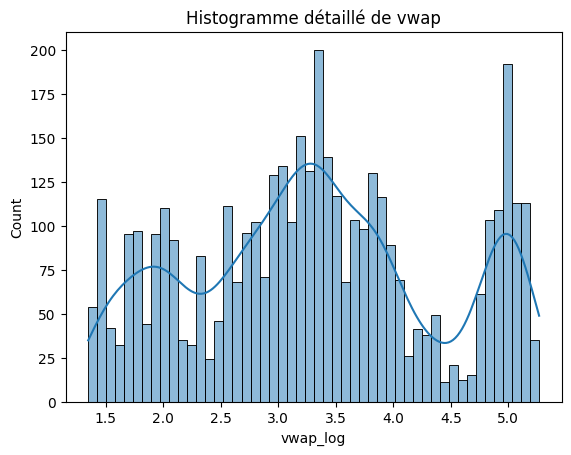

In [36]:
sns.histplot(df_transformed_log["vwap_log"], bins=50, kde=True)
plt.title("Histogramme détaillé de vwap")
plt.show()


In [37]:
print(calculate_outlier_percentage(df_transformed_log, "vwap_log", 4))
print(calculate_outlier_percentage(df_transformed_log, "vwap_log", 5))

0.0
0.0


Enfin, nous pouvons definir notre dataframe final, nous garderons les colonnes volume_log, transaction_log, vwap_log.

Les colonnes price  (open, close, heigh et low) sont indipendsable pour l'analyse des tendences financières selon la colonne time, nous allons alors introduire également leurs transofmrations log.

In [38]:
#Reintégrate price-related columns in df_transformed
df_transformed_log['open'] = data['open']
df_transformed_log['close'] = data['close']
df_transformed_log['high'] = data['high']
df_transformed_log['low'] = data['low']
df_transformed_log.columns

Index(['vwap', 'time', 'volume_log', 'transactions_log_win', 'hour',
       'vwap_log', 'open', 'close', 'high', 'low'],
      dtype='object')

In [39]:
# Log transformation for price-related columns
df_transformed_log.loc[df_transformed_log["hour"] == 4, "open_log"]= np.log(df_transformed_log.loc[df_transformed_log["hour"] == 4, "open"]+1)
df_transformed_log.loc[df_transformed_log["hour"] == 5, "open_log"]= np.log(df_transformed_log.loc[df_transformed_log["hour"] == 5, "open"]+1)


df_transformed_log.loc[df_transformed_log["hour"] == 4, "close_log"]= np.log(df_transformed_log.loc[df_transformed_log["hour"] == 4, "close"]+1)
df_transformed_log.loc[df_transformed_log["hour"] == 5, "close_log"]= np.log(df_transformed_log.loc[df_transformed_log["hour"] == 5, "close"]+1)

df_transformed_log.loc[df_transformed_log["hour"] == 4, "high_log"]= np.log(df_transformed_log.loc[df_transformed_log["hour"] == 4, "high"]+1)
df_transformed_log.loc[df_transformed_log["hour"] == 5, "high_log"]= np.log(df_transformed_log.loc[df_transformed_log["hour"] == 5, "high"]+1)

df_transformed_log.loc[df_transformed_log["hour"] == 4, "low_log"]= np.log(df_transformed_log.loc[df_transformed_log["hour"] == 4, "low"]+1)
df_transformed_log.loc[df_transformed_log["hour"] == 5, "low_log"]= np.log(df_transformed_log.loc[df_transformed_log["hour"] == 5, "low"]+1)


In [40]:
# Creating final dataset
df_final = df_transformed_log.drop(columns = ["vwap", "hour", "open", "close", "high", "low"], inplace=False)
df_final.columns

Index(['time', 'volume_log', 'transactions_log_win', 'vwap_log', 'open_log',
       'close_log', 'high_log', 'low_log'],
      dtype='object')

**Statisctical Analysis**



In [41]:
print("Première date :", df_final["time"].min())
print("Dernière date :", df_final["time"].max())

Première date : 2007-01-03 05:00:00
Dernière date : 2023-07-12 04:00:00


We plot the closing price (`close_log`) over time to visualize the trend. The plot displays the evolution of Apple's closing price, with date labels rotated for better readability.


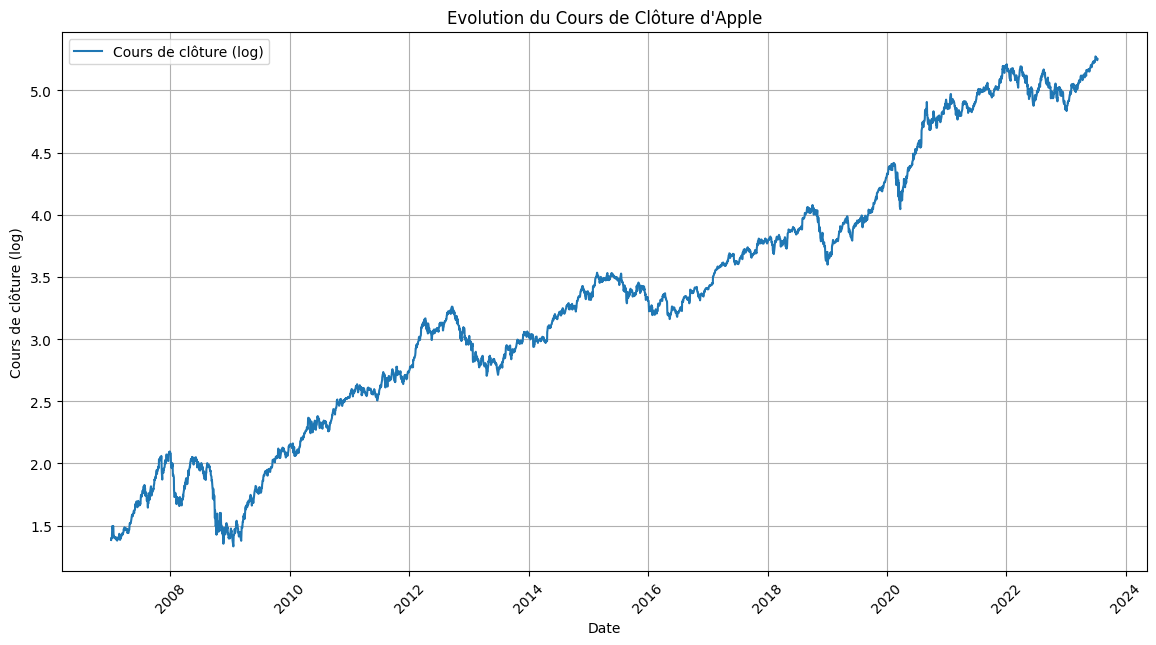

In [42]:
# Plotting the Closing Price Over Time
plt.figure(figsize=(14,7))
plt.plot(df_final['time'], df_final['close_log'], label='Cours de clôture (log)')
plt.xlabel('Date')
plt.ylabel('Cours de clôture (log)')
plt.title('Evolution du Cours de Clôture d\'Apple')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


Now, We plot the traded volume (`volume_log`) over time to observe the trend in trading activity. This plot shows the evolution of Apple's traded volume, with date labels rotated for better readability.

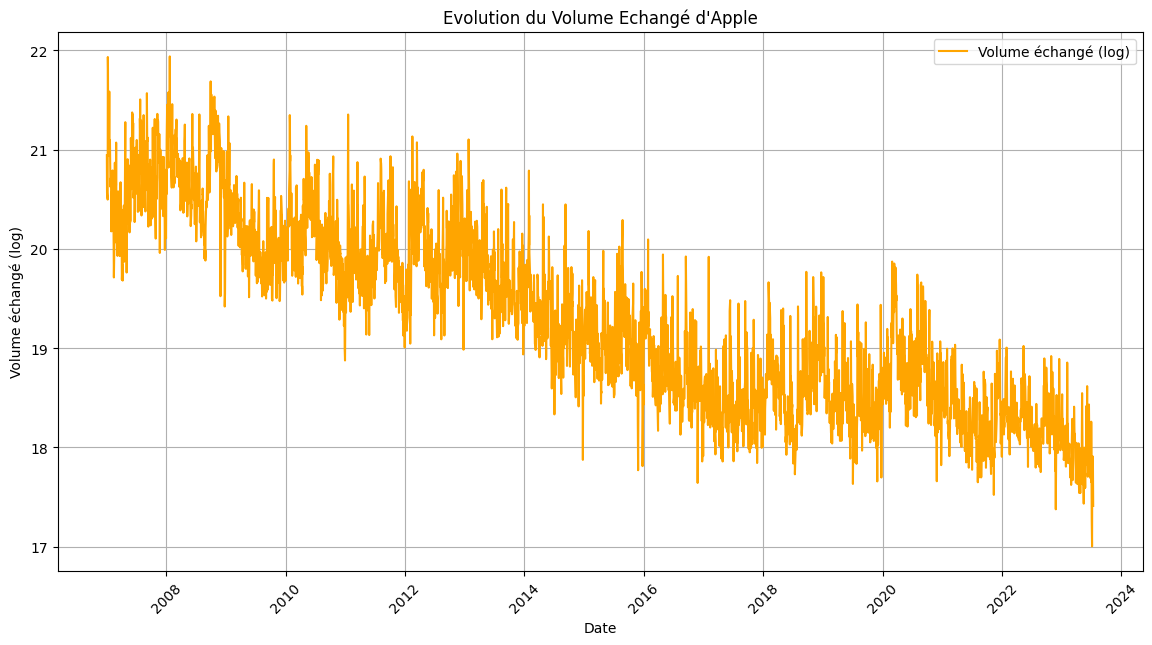

In [43]:
# Plotting the Traded Volume Over Time
plt.figure(figsize=(14,7))
plt.plot(df_final['time'], df_final['volume_log'], label='Volume échangé (log)', color='orange')
plt.xlabel('Date')
plt.ylabel('Volume échangé (log)')
plt.title('Evolution du Volume Echangé d\'Apple')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


In [44]:
!pip install mplfinance

In [45]:
import mplfinance as mpf

We first rename the columns of the dataframe to match the expected format for mplfinance.

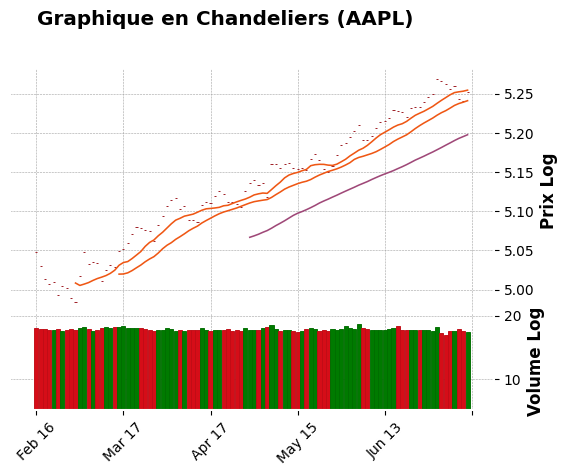

In [46]:
# Rename the columns to match the expected names for mplfinance
df_candlestick = df_final.set_index('time')[['vwap_log', 'vwap_log', 'vwap_log', 'vwap_log', 'volume_log']]  # Assuming vwap_log as the base for OHLC
df_candlestick.columns = ['Open', 'High', 'Low', 'Close', 'Volume']  # Rename columns

# Filter the data to display only the last 100 values for a zoomed-in view.df_candlestick_zoom = df_candlestick.iloc[-100:]
df_candlestick_zoom = df_candlestick.iloc[-100:]

# Define the parameters for the candlestick chart
kwargs = dict(type='candle', mav=(10,20,50), volume=True, figratio=(11,8), figscale=0.85)

mpf.plot(df_candlestick_zoom, **kwargs, style='charles', title="Graphique en Chandeliers (AAPL)", ylabel="Prix Log", ylabel_lower="Volume Log")


count    4159.000000
mean        3.314121
std         1.072146
min         1.345733
25%         2.560030
50%         3.291576
75%         3.973196
max         5.268384
Name: vwap_log, dtype: float64


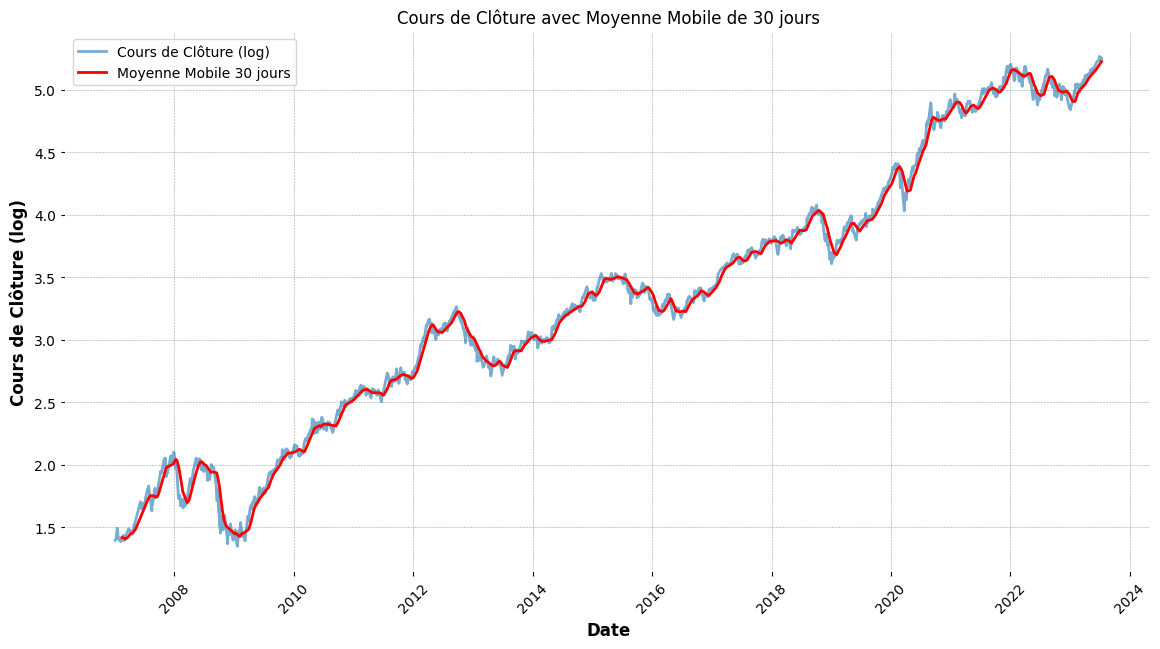

In [47]:
# Summary Statistics and Moving Average for `vwap_log`
stats_vwap_log = df_final['vwap_log'].describe()
print(stats_vwap_log)

# Calculate the 30-day moving average (`vwap_log_MA30`) for the `vwap_log` column using a rolling window of 30 periods.
#The moving average helps smooth out short-term fluctuations and highlight longer-term trends in the data.
df_final['vwap_log_MA30'] = df_final['vwap_log'].rolling(window=30).mean()

# Plot the original `vwap_log` series alongside its 30-day moving average
plt.figure(figsize=(14,7))
plt.plot(df_final['time'], df_final['vwap_log'], label='Cours de Clôture (log)', alpha=0.6)
plt.plot(df_final['time'], df_final['vwap_log_MA30'], label='Moyenne Mobile 30 jours', color='red')
plt.xlabel('Date')
plt.ylabel('Cours de Clôture (log)')
plt.title('Cours de Clôture avec Moyenne Mobile de 30 jours')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


**T-Test to Compare the Averages of `vwap_log` for 2020 and 2021**

In [48]:
# Select the `vwap_log` data for the years 2020 and 2021 by filtering the `time` column based on the year
df_2020 = df_final[df_final['time'].dt.year == 2020]['vwap_log']
df_2021 = df_final[df_final['time'].dt.year == 2021]['vwap_log']

# Perform a t-test using the `ttest_ind` function from the `scipy.stats` library
t_stat, p_value = stats.ttest_ind(df_2020, df_2021)
print(f"Statistique t: {t_stat}, p-value: {p_value}")


Statistique t: -25.727594421649354, p-value: 8.809176140786694e-94


The t-statistic is -25.73, and the p-value is extremely small (8.81e-94), indicating a highly significant difference between the means of `vwap_log` for the years 2020 and 2021. Since the p-value is much smaller than the common significance threshold of 0.05, we reject the null hypothesis and conclude that there is a statistically significant difference in the means of the two years.


In [49]:
# Calculate daily_returns (pecentage change between tow days)
df_final['daily_returns'] = df_final['vwap_log'].pct_change()

# # Normality Test for Daily Returns (Shapiro-Wilk Test)
stat, p_value = stats.shapiro(df_final['daily_returns'].dropna())
print(f"Statistique Shapiro: {stat}, p-value: {p_value}")

Statistique Shapiro: 0.8550112524829493, p-value: 3.639142898206183e-52


Since the p-value is much smaller than 0.05, we reject the null hypothesis that the daily returns follow a normal distribution.

In [50]:
#  Correlation between Moving Averages of `vwap_log` and Traded Volume

#We first calculate the 30-day moving average for both the `vwap_log` and `volume_log` columns to smooth the data. Then,
# we calculate the correlation coefficient between the two moving averages.
df_final['volume_log_MA30'] = df_final['volume_log'].rolling(window=30).mean()

# Calculate corrélation
correlation = np.corrcoef(df_final['vwap_log_MA30'].dropna(), df_final['volume_log_MA30'].dropna())
print(f"Corrélation entre la moyenne mobile du vwap_log et du volume échangé : {correlation[0, 1]}")


Corrélation entre la moyenne mobile du vwap_log et du volume échangé : -0.9023113380615565


The correlation between the moving averages of `vwap_log` and `volume_log` is -0.90, indicating a strong negative correlation. This suggests that as the moving average of `vwap_log` increases, the moving average of the traded volume tends to decrease, and vice versa.

 **30-Day Moving Average Using `np.convolve`**

We calculate the 30-day moving average for the `vwap_log` column using the `np.convolve` function.

A window of 30 equal weights (`np.ones(30) / 30`) is applied to the data, which smooths out fluctuations and highlights the overall trend.


This method provides an alternative way of calculating the moving average compared to the `rolling()` function, and the plot visually represents the smoothed `vwap_log` values.


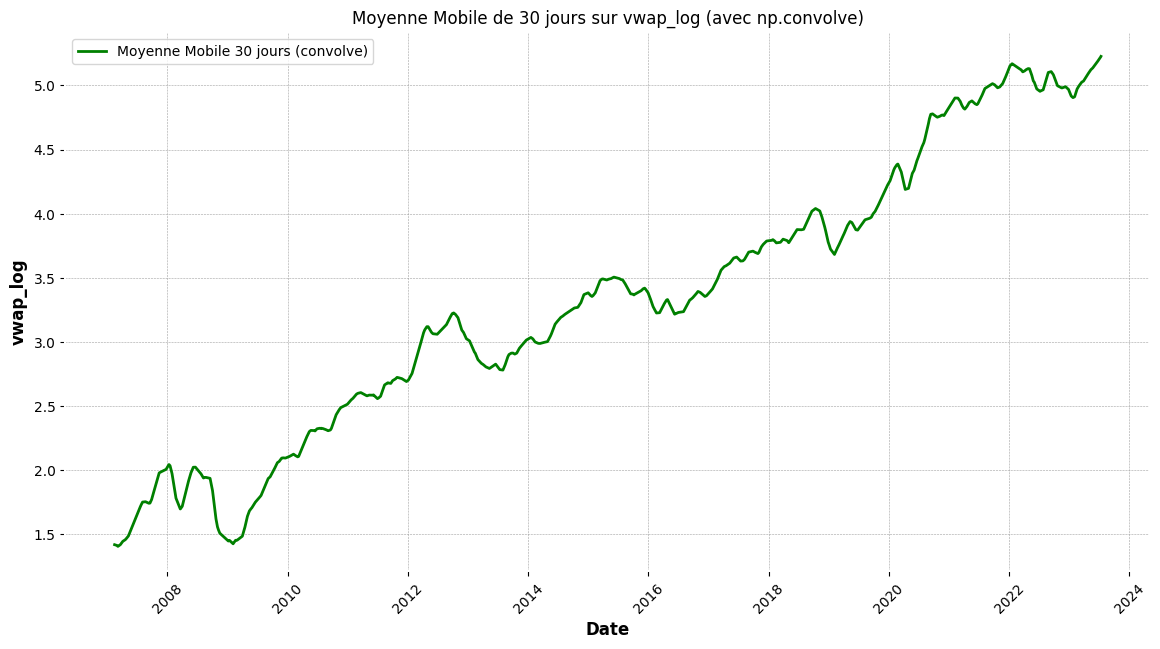

In [51]:
window = np.ones(30) / 30
vwap_ma_convolve = np.convolve(df_final['vwap_log'], window, mode='valid') ## The `mode='valid'` ensures that the convolution is only applied where the window fully overlaps with the data, resulting in a shorter series. We then plot the moving average, showing the trend of `vwap_log` over time.

# Visualisation
plt.figure(figsize=(14,7))
plt.plot(df_final['time'].iloc[29:], vwap_ma_convolve, label='Moyenne Mobile 30 jours (convolve)', color='green')
plt.xlabel('Date')
plt.ylabel('vwap_log')
plt.title('Moyenne Mobile de 30 jours sur vwap_log (avec np.convolve)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


**Comprehensive Summary of Insights:**

*Advanced Statistical Analysis

This project aimed to perform an in-depth statistical analysis of Apple Inc.'s trading data, with a particular focus on understanding the behavior of VWAP and price columns, managing outliers, and ensuring the data was suitable for further exploration.

* Correlation and Trend Analysis

Throughout the analysis, we focused on understanding the relationships between variables, particularly how price data correlates with volume. By computing moving averages and examining the correlations between transformed variables, we gained insights into the overall market behavior:

* Correlation Analysis:

A significant negative correlation was found between the moving averages of vwap_log and volume_log, suggesting an inverse relationship between price and traded volume over time.

* Trend Analysis:

The use of rolling averages provided insights into the overall price trends and volume fluctuations, helping to identify periods of market stability and volatility.

* Statistical Tests on Returns

To assess the behavior of daily returns, we performed a Shapiro-Wilk test to test for normality in the returns. The results indicated that the daily returns did not follow a normal distribution, suggesting the need for more robust models that can account for non-normal behavior in the data.



**Challenges an Solutions:**

The primary challenges in this analysis were Outlier Management and the Bimodality of VWAP and Price Columns.

* Outlier Management

Outliers can significantly affect the results of statistical analysis and machine learning models. In this project, we identified and handled outliers in the volume and transaction columns, which exhibited skewed distributions. To mitigate their impact, we applied logarithmic transformations to these columns. This transformation reduced the effect of extreme values and made the data more suitable for further analysis.

Solution:

For volume, we applied logarithmic transformations using np.log1p(), which effectively reduced the impact of outliers.

But for transactions, the logarithmic transformation did not fully eliminate the outliers. As a result, we applied winsorization after the logarithmic transformation to cap the extreme values at a specified percentile, further reducing the influence of extreme outliers.

* Bimodality of VWAP

The vwap column exhibited a bimodal distribution, which is a critical characteristic of the data that needed thorough investigation. The bimodal distribution suggested that there were two distinct modes within the data, potentially representing different trading behaviors at different times of the day.

Solution:

We analyzed the KDE and histogram of the vwap distribution, confirming its bimodal nature with distinct modes centered around 100.

A Shapiro-Wilk test indicated that each mode did not follow a normal distribution, which was further confirmed by the Anderson-Darling and Kolmogorov-Smirnov tests.

As the two modes had right-skewed distributions with slightly heavy tails, we decided to apply logarithmic transformations to the vwap column to address the skewness and make the data more appropriate for analysis.

By addressing both the outlier handling and the bimodal nature of the vwap and price columns, we ensured that the data was cleaner and more suitable for drawing meaningful insights from the statistical analyses and visualizations.


